****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
data_frame = pd.read_csv('PETR4_2018-07-02_2019-01-31.csv')

In [3]:
data_frame.count()

Start                        17544
End                          17544
NegociatedOffersAmount       17544
TotalTradedQuantity          17544
RSIIndicator                 17544
SMAIndicatorDiff             17544
EMAIndicatorDiff             17544
UpperBollingerBand           17544
LowerBollingerBand           17544
MiddleBollingerBand          17544
MACD                         17544
AroonUpIndicator             17544
AroonDownIndicator           17544
AroonIndicator               17544
PlusDirectionalIndicator     17544
MinusDirectionalIndicator    17544
ADXIndicator                 17544
CCI                          17544
CMO                          17544
ROC                          17544
BuySignal                    17544
BidPrice                     17544
Profit                       17544
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.667407660738714

In [5]:
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,02/07/2018 11:26:00,02/07/2018 11:29:00,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.01
1,02/07/2018 11:29:00,02/07/2018 11:32:00,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.01
2,02/07/2018 11:32:00,02/07/2018 11:35:00,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.01
3,02/07/2018 11:35:00,02/07/2018 11:38:00,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,1,17.14,0.01
4,02/07/2018 11:38:00,02/07/2018 11:41:00,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.01


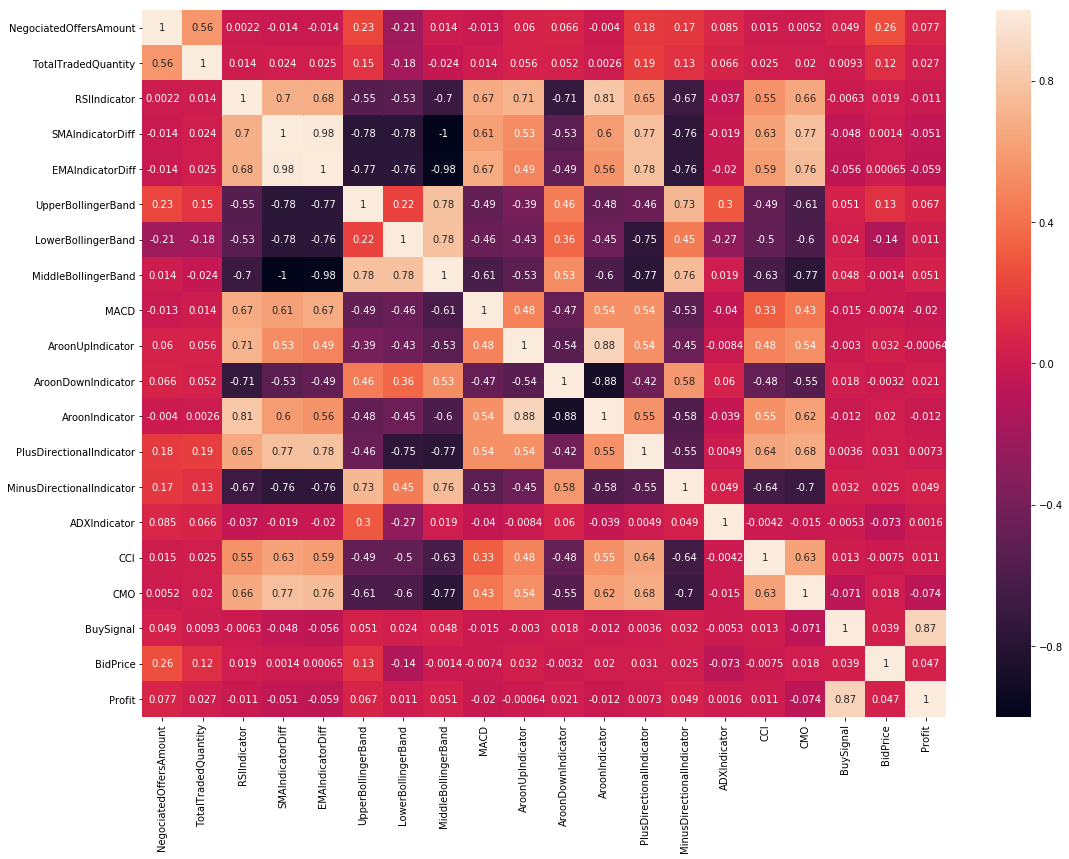

In [6]:
temp = data_frame.drop(["ROC"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [7]:
x_train = data_frame.drop(["Start", "End"], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.01
1,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.01
2,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.01
3,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,1,17.14,0.01
4,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.01


In [8]:
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,4.927254,11.863582,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.01
1,4.897840,11.433882,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.01
2,4.955827,11.675894,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.01
3,5.442418,13.319902,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,1,17.14,0.01
4,5.575949,12.736701,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.01


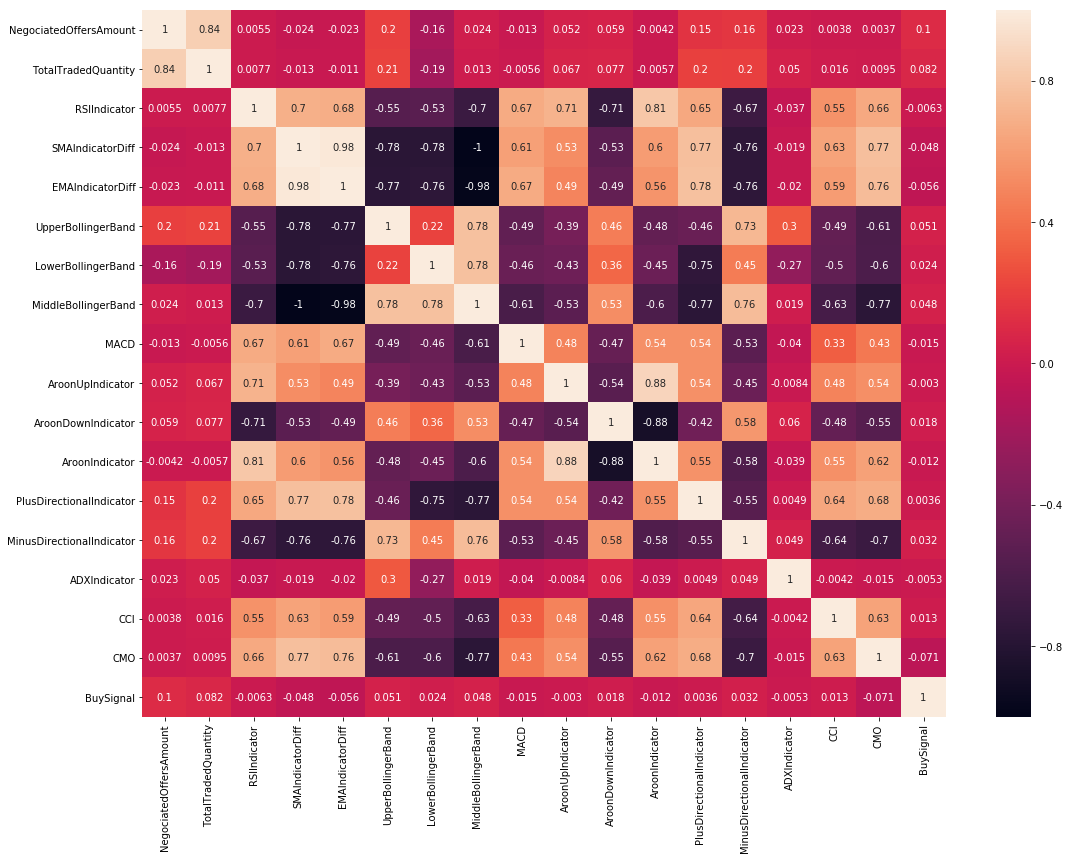

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

profit = x_train["Profit"]
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

temp = x_train.drop(["ROC", "BidPrice","Profit"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

x_train = x_train.dropna()
#y_train = x_train["BuySignal"]
x_train = x_train.drop(["BidPrice"], axis=1)

Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [10]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

average_data_per_day = 120
max_days_interval = 120
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day
days = []
logreg_precisions = []
logreg_recalls = []
logreg_f1 = []
logreg_profit = []
mlp_precisions = []
mlp_recalls = []
mlp_f1 = []
mlp_profit = []

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    mlp_precision_arr = []
    logreg_precision_arr = []
    mlp_recall_arr = []
    logreg_recall_arr = []
    mlp_profit_arr = []
    logreg_profit_arr = []
    mlp_f1_arr = []
    logreg_f1_arr = []
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
            
            day_mlp_profit_arr = []
            day_logreg_profit_arr = []
            #print("(MiddleRange,MaxRange): (" + str(middle_range) + "," + str (max_range) + ")")
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            
            current_profit = profit[middle_range:max_range]
            
            #print ("Distribution before: " + str(len(x_train[min_range:middle_range][x_train[min_range:middle_range]['BuySignal'] == 1].index)/len(x_train[min_range:middle_range].index)))
            
            g = x_train[min_range:middle_range].groupby('BuySignal')
            x_train_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
            #print ("Distribution after: " + str(len(x_train_balanced[x_train_balanced['BuySignal'] == 1].index)/len(x_train_balanced.index)))
            
            new_mlp.fit(x_train_balanced.drop(["BuySignal", "Profit"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_mlp.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_mlp_profit_arr.append(current_profit.as_matrix()[s])
            
            #print("MLP (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("MLP Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))
            mlp_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_mlp_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            mlp_score_arr.append(mlp_score)
            
            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train_balanced.drop(["BuySignal", "Profit"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_logreg.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_logreg_profit_arr.append(current_profit.as_matrix()[s])
                  
            #print("LogReg (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("LogReg Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))     
            logreg_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_logreg_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_logreg_score_arr.append(acc_logreg_score)
            logreg_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            logreg_score_arr.append(logreg_score)
            
            mlp_profit_arr.append(np.sum(day_mlp_profit_arr))
            logreg_profit_arr.append(np.sum(day_logreg_profit_arr))
      
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))  
    print ("MLP Average Precision Score: " + str(np.sum(mlp_precision_arr)/len(mlp_precision_arr)))
    print ("MLP Average Recall Score: " + str(np.sum(mlp_recall_arr)/len(mlp_recall_arr)))
    print ("MLP Average f1 Score: " + str(np.sum(mlp_f1_arr)/len(mlp_f1_arr)))
    print ("MLP Average Profit: " + str(np.sum(mlp_profit_arr)/len(mlp_profit_arr)))
      
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr))) 
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))  
    print ("LogReg Average Precision Score: " + str(np.sum(logreg_precision_arr)/len(logreg_precision_arr)))
    print ("LogReg Average Recall Score: " + str(np.sum(logreg_recall_arr)/len(logreg_recall_arr)))
    print ("LogReg Average f1 Score: " + str(np.sum(logreg_f1_arr)/len(logreg_f1_arr)))
    print ("LogReg Average Profit: " + str(np.sum(logreg_profit_arr)/len(logreg_profit_arr)))
    
    logreg_precisions.append(np.sum(logreg_precision_arr)/len(logreg_precision_arr))
    logreg_recalls.append(np.sum(logreg_recall_arr)/len(logreg_recall_arr))
    logreg_f1.append(np.sum(logreg_f1_arr)/len(logreg_f1_arr))
    logreg_profit.append(np.sum(logreg_profit_arr)/len(logreg_profit_arr))
    mlp_precisions.append(np.sum(mlp_precision_arr)/len(mlp_precision_arr))
    mlp_recalls.append(np.sum(mlp_recall_arr)/len(mlp_recall_arr))
    mlp_f1.append(np.sum(mlp_f1_arr)/len(mlp_f1_arr))
    mlp_profit.append(np.sum(mlp_profit_arr)/len(mlp_profit_arr))
    days.append(day)

Days used to train: 1
Days to be predicted: 1
MLP Average Accuracy Score: 0.522203196347032
MLP Average Balanced Accuracy Score: 0.5216747683660421
MLP Average Precision Score: 0.687203063983705
MLP Average Recall Score: 0.5236198587251129
MLP Average f1 Score: 0.5809559080125445
MLP Average Profit: 0.15328767123287676
LogReg Average Accuracy Score: 0.5196917808219178
LogReg Average Balanced Accuracy Score: 0.5198389825774783
LogReg Average Precision Score: 0.6823769490361101
LogReg Average Recall Score: 0.5287841733130038
LogReg Average f1 Score: 0.5773925039775897
LogReg Average Profit: 0.14636986301369867
Days used to train: 2
Days to be predicted: 1
MLP Average Accuracy Score: 0.5356896551724137
MLP Average Balanced Accuracy Score: 0.5254518600610445
MLP Average Precision Score: 0.6954453752441334
MLP Average Recall Score: 0.5499903694972004
MLP Average f1 Score: 0.5985638636015062
MLP Average Profit: 0.16503448275862065
LogReg Average Accuracy Score: 0.5381609195402299
LogReg Aver

MLP Average Accuracy Score: 0.5527777777777778
MLP Average Balanced Accuracy Score: 0.5442182985904794
MLP Average Precision Score: 0.7093832257620456
MLP Average Recall Score: 0.5631855359610762
MLP Average f1 Score: 0.616193037066004
MLP Average Profit: 0.2035606060606059
LogReg Average Accuracy Score: 0.5554924242424243
LogReg Average Balanced Accuracy Score: 0.5480218063356234
LogReg Average Precision Score: 0.7161252387788246
LogReg Average Recall Score: 0.561547544240079
LogReg Average f1 Score: 0.618721099886758
LogReg Average Profit: 0.20772727272727268
Days used to train: 16
Days to be predicted: 1
MLP Average Accuracy Score: 0.5526717557251909
MLP Average Balanced Accuracy Score: 0.5443338135412571
MLP Average Precision Score: 0.7103512781811075
MLP Average Recall Score: 0.5700247748470877
MLP Average f1 Score: 0.6210350552399111
MLP Average Profit: 0.19702290076335868
LogReg Average Accuracy Score: 0.5551526717557251
LogReg Average Balanced Accuracy Score: 0.5506654093510226

MLP Average Accuracy Score: 0.5649717514124294
MLP Average Balanced Accuracy Score: 0.551552120801645
MLP Average Precision Score: 0.7244485730221158
MLP Average Recall Score: 0.585312139926179
MLP Average f1 Score: 0.6361143020093795
MLP Average Profit: 0.22618644067796603
LogReg Average Accuracy Score: 0.561087570621469
LogReg Average Balanced Accuracy Score: 0.5532972455290822
LogReg Average Precision Score: 0.7263064846972429
LogReg Average Recall Score: 0.5730478313403681
LogReg Average f1 Score: 0.6302435241500394
LogReg Average Profit: 0.2211864406779661
Days used to train: 30
Days to be predicted: 1
MLP Average Accuracy Score: 0.5698717948717951
MLP Average Balanced Accuracy Score: 0.5545167232376261
MLP Average Precision Score: 0.7254645966300637
MLP Average Recall Score: 0.5977338385969299
MLP Average f1 Score: 0.644599461675874
MLP Average Profit: 0.23222222222222202
LogReg Average Accuracy Score: 0.5608262108262109
LogReg Average Balanced Accuracy Score: 0.5596860681409208


MLP Average Accuracy Score: 0.5718749999999999
MLP Average Balanced Accuracy Score: 0.5479170364215181
MLP Average Precision Score: 0.7226792626774396
MLP Average Recall Score: 0.6040222454776131
MLP Average f1 Score: 0.6458589608798723
MLP Average Profit: 0.2397115384615383
LogReg Average Accuracy Score: 0.5704326923076923
LogReg Average Balanced Accuracy Score: 0.5575888227794122
LogReg Average Precision Score: 0.7310621149090798
LogReg Average Recall Score: 0.5867961290054959
LogReg Average f1 Score: 0.6423164021081731
LogReg Average Profit: 0.24701923076923069
Days used to train: 44
Days to be predicted: 1
MLP Average Accuracy Score: 0.5757281553398058
MLP Average Balanced Accuracy Score: 0.5542572716286143
MLP Average Precision Score: 0.7294180950096488
MLP Average Recall Score: 0.6023129365675997
MLP Average f1 Score: 0.6475385901852619
MLP Average Profit: 0.24961165048543682
LogReg Average Accuracy Score: 0.5665048543689322
LogReg Average Balanced Accuracy Score: 0.5553786192073

MLP Average Accuracy Score: 0.5771296296296295
MLP Average Balanced Accuracy Score: 0.5537957203375069
MLP Average Precision Score: 0.7293424968735036
MLP Average Recall Score: 0.6197821220996711
MLP Average f1 Score: 0.6581443873859257
MLP Average Profit: 0.25755555555555554
LogReg Average Accuracy Score: 0.5732407407407407
LogReg Average Balanced Accuracy Score: 0.5563794545038305
LogReg Average Precision Score: 0.7343578149726724
LogReg Average Recall Score: 0.5995526451221923
LogReg Average f1 Score: 0.6508127044894324
LogReg Average Profit: 0.2606666666666666
Days used to train: 58
Days to be predicted: 1
MLP Average Accuracy Score: 0.5701310861423221
MLP Average Balanced Accuracy Score: 0.5462255279911804
MLP Average Precision Score: 0.730027603432692
MLP Average Recall Score: 0.6130247624515046
MLP Average f1 Score: 0.6528685192605334
MLP Average Profit: 0.2493258426966292
LogReg Average Accuracy Score: 0.5693820224719102
LogReg Average Balanced Accuracy Score: 0.551306372102435

MLP Average Accuracy Score: 0.5841008771929824
MLP Average Balanced Accuracy Score: 0.5504324235490622
MLP Average Precision Score: 0.7339491075603215
MLP Average Recall Score: 0.6354238711469665
MLP Average f1 Score: 0.6728430466121751
MLP Average Profit: 0.2692105263157894
LogReg Average Accuracy Score: 0.5782894736842105
LogReg Average Balanced Accuracy Score: 0.5552933370444544
LogReg Average Precision Score: 0.7414553548554761
LogReg Average Recall Score: 0.6089157702784791
LogReg Average f1 Score: 0.66046689831763
LogReg Average Profit: 0.27078947368421047
Days used to train: 72
Days to be predicted: 1
MLP Average Accuracy Score: 0.584
MLP Average Balanced Accuracy Score: 0.5509383827184008
MLP Average Precision Score: 0.7334507094154507
MLP Average Recall Score: 0.6289923987260418
MLP Average f1 Score: 0.6681334707764894
MLP Average Profit: 0.2693333333333332
LogReg Average Accuracy Score: 0.5814444444444443
LogReg Average Balanced Accuracy Score: 0.5614527465881239
LogReg Avera

MLP Average Accuracy Score: 0.6017473118279568
MLP Average Balanced Accuracy Score: 0.5603387201946526
MLP Average Precision Score: 0.7433254779822757
MLP Average Recall Score: 0.6630212110578204
MLP Average f1 Score: 0.6928943523030245
MLP Average Profit: 0.2951612903225807
LogReg Average Accuracy Score: 0.5826612903225807
LogReg Average Balanced Accuracy Score: 0.5540568497808224
LogReg Average Precision Score: 0.7450991767460455
LogReg Average Recall Score: 0.6194424259355804
LogReg Average f1 Score: 0.6662455101462037
LogReg Average Profit: 0.2762903225806452
Days used to train: 86
Days to be predicted: 1
MLP Average Accuracy Score: 0.5915300546448089
MLP Average Balanced Accuracy Score: 0.548914967929532
MLP Average Precision Score: 0.7360677432703507
MLP Average Recall Score: 0.6486512341582615
MLP Average f1 Score: 0.6808615245404912
MLP Average Profit: 0.2786885245901639
LogReg Average Accuracy Score: 0.5770491803278688
LogReg Average Balanced Accuracy Score: 0.5484345007907502

MLP Average Accuracy Score: 0.6003472222222223
MLP Average Balanced Accuracy Score: 0.5528592951436742
MLP Average Precision Score: 0.7431006224079365
MLP Average Recall Score: 0.6503603651439155
MLP Average f1 Score: 0.6842478389995214
MLP Average Profit: 0.2887499999999999
LogReg Average Accuracy Score: 0.5887152777777778
LogReg Average Balanced Accuracy Score: 0.5577852696650636
LogReg Average Precision Score: 0.751756190442586
LogReg Average Recall Score: 0.6181629631243171
LogReg Average f1 Score: 0.6691018297585103
LogReg Average Profit: 0.28270833333333334
Days used to train: 100
Days to be predicted: 1
MLP Average Accuracy Score: 0.6088652482269502
MLP Average Balanced Accuracy Score: 0.5605547170738464
MLP Average Precision Score: 0.7533216011474404
MLP Average Recall Score: 0.6666866730003504
MLP Average f1 Score: 0.696268822359456
MLP Average Profit: 0.3027659574468086
LogReg Average Accuracy Score: 0.5812056737588652
LogReg Average Balanced Accuracy Score: 0.554570143429419

MLP Average Accuracy Score: 0.6105392156862743
MLP Average Balanced Accuracy Score: 0.5537557106562752
MLP Average Precision Score: 0.7459387156237703
MLP Average Recall Score: 0.6672624349398127
MLP Average f1 Score: 0.6947010862330689
MLP Average Profit: 0.29941176470588227
LogReg Average Accuracy Score: 0.5825980392156863
LogReg Average Balanced Accuracy Score: 0.5537793477155374
LogReg Average Precision Score: 0.749627593485912
LogReg Average Recall Score: 0.6064133353130691
LogReg Average f1 Score: 0.6581687739858559
LogReg Average Profit: 0.27088235294117635
Days used to train: 114
Days to be predicted: 1
MLP Average Accuracy Score: 0.598989898989899
MLP Average Balanced Accuracy Score: 0.5506492704612329
MLP Average Precision Score: 0.7446906206166269
MLP Average Recall Score: 0.6533930963372379
MLP Average f1 Score: 0.6854405804819459
MLP Average Profit: 0.28484848484848474
LogReg Average Accuracy Score: 0.5856060606060606
LogReg Average Balanced Accuracy Score: 0.5608216862448

In [44]:
def performance_plot(days, precision, recall, f1, figsize, title, precision_xytextpos, recall_xytextpos, f1_xytextpos):

    plt.figure(1, figsize=figsize)

    plt.subplot(111)
    lines = plt.plot(days, precision, days, recall, days, f1)
    plt.setp(lines[0], linewidth=2)
    plt.setp(lines[1], linewidth=2)
    plt.setp(lines[2], linewidth=2)
    plt.legend(('Precisões', 'Realocações', 'F1'),
            loc='lower right')
    plt.title(title)

    xy_precision = (precision.index(max(precision)) + 1, max(precision))
    xy_recall = (recall.index(max(recall)) + 1, max(recall))
    xy_f1 = (f1.index(max(f1)) + 1, max(f1))

    plt.annotate(str(xy_precision), xy=xy_precision, xytext=precision_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_recall), xy=xy_recall, xytext=recall_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_f1), xy=xy_f1, xytext=f1_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )
    
    plt.ylim(0.5, .8)
    plt.ylabel('Performance')
    plt.xlabel('Dias de Treino')
    plt.xlim(1,120)
    plt.show()

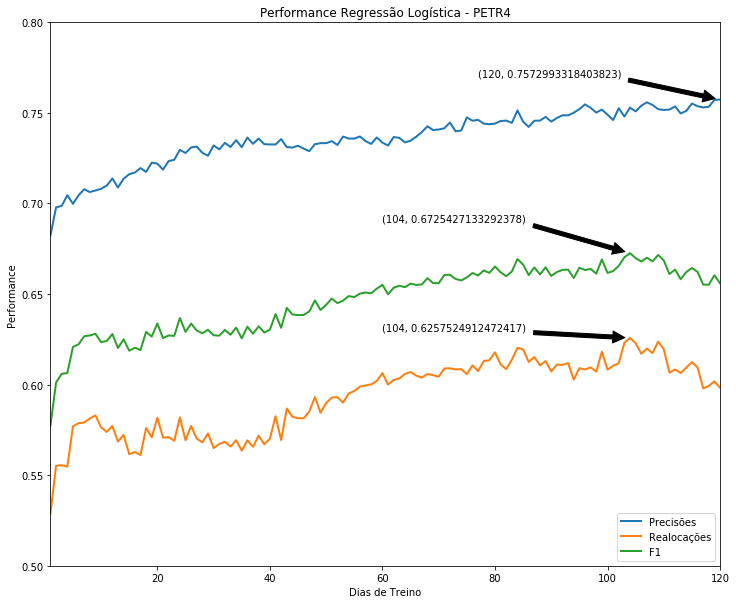

In [56]:
performance_plot(days, logreg_precisions, logreg_recalls, logreg_f1,(12,10), 'Performance Regressão Logística - PETR4', (77, 0.77),(60, 0.63),(60, 0.69))

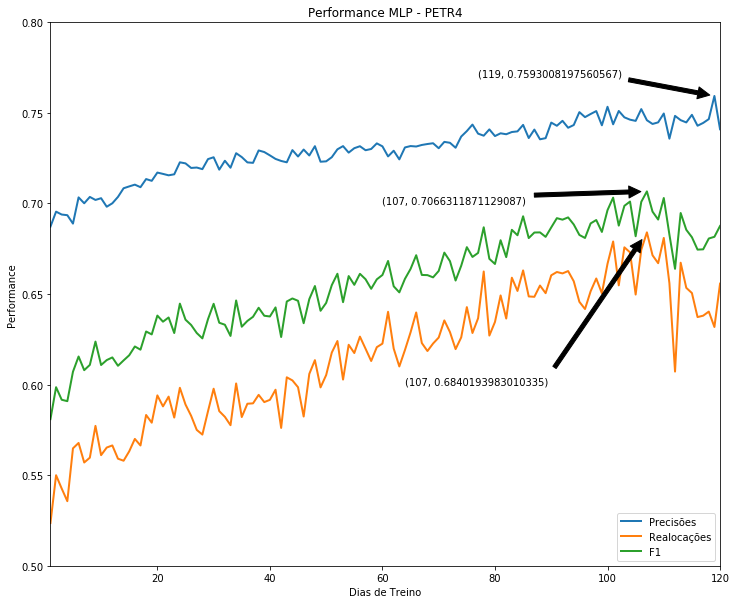

In [57]:
performance_plot(days, mlp_precisions, mlp_recalls, mlp_f1, (12,10), 'Performance MLP - PETR4', (77, 0.77),(64, 0.6),(60, 0.7))

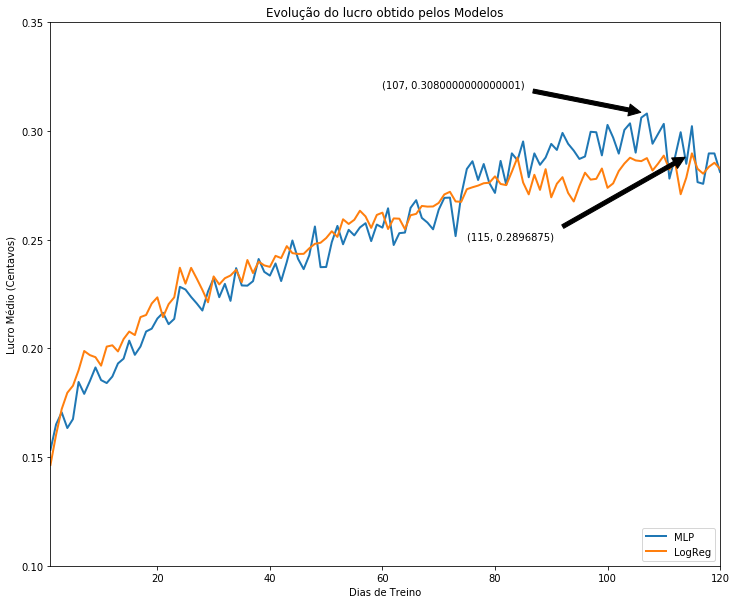

In [58]:
plt.figure(1, figsize=(12,10))

plt.subplot(111)
lines = plt.plot(days, mlp_profit, days, logreg_profit)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.legend(('MLP', 'LogReg'),
        loc='lower right')
plt.title("Evolução do lucro obtido pelos Modelos")

xy_mlp = (mlp_profit.index(max(mlp_profit)) + 1, max(mlp_profit))
xy_logreg = (logreg_profit.index(max(logreg_profit)) + 1, max(logreg_profit))

plt.annotate(str(xy_mlp), xy=xy_mlp, xytext=(60,0.32),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_logreg), xy=xy_logreg, xytext=(75,0.25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(0.1, 0.35)
plt.xlim(1,120)
plt.ylabel('Lucro Médio (Centavos)')
plt.xlabel('Dias de Treino')
plt.show()